# Übung 5

## Aufgabe 21

Laden Sie den Datensatz PC1.txt in einen R Datensatz. Führen
Sie mit den 20 Variablen die Hauptkomponentenanalyse auf Basis der Korrelationsmatrix durch. Wie groß ist die Gesamtvarianz des Datensatzes? Plotten
Sie die Varianzen der Hauptkomponenten in einem Linienplot. Geben Sie das
kleinste k an, sodass
$\text{Var}(H_1) + . . . + \text{Var}(H_k)$
über 90% der Gesamtvarianz ausmacht?

In [1]:
data <- read.csv(file="PC1.txt", sep=";")

head(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.68341880,-1.4695051,0.4774300,0.6547868,-0.07012435,-0.4668827,-0.9770980,-0.3005471,0.6977075,-0.6981602,0.5590965,-0.6406616,-0.8261317,0.7407614,-0.7861422,-0.6148769,-0.63706542,-0.74850800,-0.2415937,1.2295823
2,2.30851042,1.1481063,-2.2960833,-2.3108601,-1.86627915,2.3762613,2.0595834,2.4904094,-2.3020555,2.4285822,-2.3182751,2.2168019,2.0887910,-0.7149070,2.3460510,2.3702147,-0.48095629,-0.52056554,2.2420904,-1.8630761
3,1.21838969,0.8148721,-1.0934110,-1.1827685,-0.41740642,1.2232959,1.1948040,1.2326954,-1.2548334,1.3864969,-1.1171127,0.9816147,1.3089780,-0.1182427,1.6564632,1.1904064,-0.03399397,-0.08134763,0.8589727,-1.3088142
4,-1.12928590,-1.7599400,1.1552311,1.0272906,1.57955670,-0.9790329,-1.0170415,-0.7178412,1.0558778,-0.5325059,1.0745916,-1.1868661,-1.2047943,1.7938399,-0.3681199,-0.9980027,-0.42917703,-0.47321543,-1.2840665,1.3948574
5,-0.03525435,0.1716311,0.3032053,0.4741171,0.14622966,-0.4396442,-0.7444663,-0.2843658,0.4604997,-0.4138176,0.3983674,-0.4178876,-0.1500681,-0.8539510,-0.5758207,-0.3190088,-1.23876159,-1.20243327,-0.1046576,0.2411435
6,-0.18284563,-0.8450000,-0.3353339,-0.5136201,-0.46062280,0.5556794,0.7543919,0.3791597,-0.4590920,0.3693341,-0.4467142,0.4875904,-0.1254508,1.5981272,0.5181474,0.3125656,1.54565782,1.49326849,0.1992007,0.1961880


In [2]:
pca <- prcomp(data, scale.=TRUE)

pca

Standard deviations (1, .., p=20):
 [1] 3.9517633527 1.5067709195 1.1662607181 0.7067643498 0.4980306730
 [6] 0.0646952824 0.0212487732 0.0193148929 0.0117624754 0.0091712834
[11] 0.0080689839 0.0070940198 0.0061654862 0.0059691040 0.0052521859
[16] 0.0043835103 0.0032430105 0.0029486936 0.0023510223 0.0004479758

Rotation (n x k) = (20 x 20):
             PC1          PC2           PC3          PC4         PC5
X1   0.248181058 -0.121580514 -0.0408230061  0.065146218  0.02094017
X2   0.187711523  0.045617703 -0.5420015073  0.284753339  0.13904397
X3  -0.250899511  0.013135369 -0.0470787415  0.117746307  0.16135538
X4  -0.250932857 -0.048981425 -0.0820540597  0.022141431 -0.08176617
X5  -0.221963353 -0.026098102  0.0787136720  0.652400687  0.17687439
X6   0.249254103  0.020597960  0.1284325153 -0.067822723 -0.12182890
X7   0.235636417  0.204713394  0.0339795928  0.088992974  0.35963468
X8   0.242444918 -0.100604162  0.2041041698 -0.053626830  0.05291353
X9  -0.251272526 -0.048816065 -0.

**Gesamtvarianz:**

In [3]:
pca$sdev^2
cat("Gesamtvarianz: ", sum(pca$sdev^2))

[1] 1.561643e+01 2.270359e+00 1.360164e+00 4.995158e-01 2.480346e-01
 [6] 4.185480e-03 4.515104e-04 3.730651e-04 1.383558e-04 8.411244e-05
[11] 6.510850e-05 5.032512e-05 3.801322e-05 3.563020e-05 2.758546e-05
[16] 1.921516e-05 1.051712e-05 8.694794e-06 5.527306e-06 2.006823e-07

Gesamtvarianz:  20

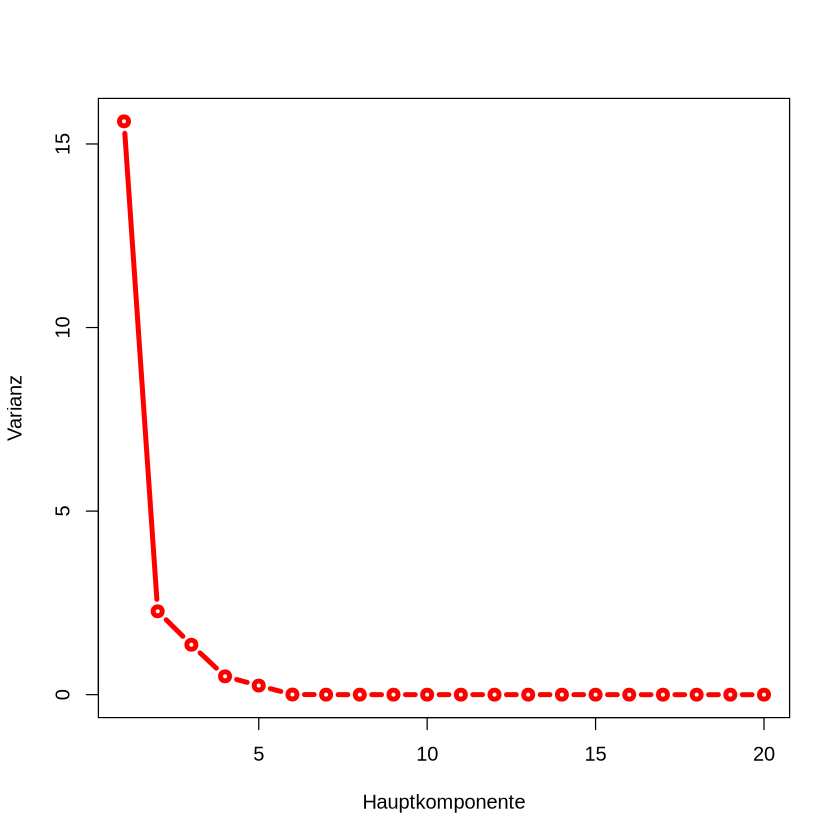

In [4]:
plot(pca$sdev^2, type="b", col="red", ylab="Varianz", xlab="Hauptkomponente", lwd=4)

Kleinstes $k$, sodass
$$\text{Var}(H_1) + . . . + \text{Var}(H_k) > 90\% \text{ der Gesamtvarianz}$$

In [5]:
var <- pca$sdev^2
total_var <- sum(var)
total_var_90 <- total_var * 0.9

for (k in 1:100) {
    cum_var <- sum(var[1:k])
    cat("k =", k, "ergibt", (cum_var/total_var)*100, "% der Gesamtvarianz\n")
    if (cum_var > total_var_90) {
        cat("Kleinstes k =", k)
        break
    }
}

k = 1 ergibt 78.08217 % der Gesamtvarianz
k = 2 ergibt 89.43396 % der Gesamtvarianz
k = 3 ergibt 96.23478 % der Gesamtvarianz
Kleinstes k = 3

## Aufgabe 22
Zeigen Sie, dass die Kovarianz von zwei Hauptkomponenten $H_i$
und $H_j$ mit $i \ne j$ verschwindet $(\text{Cov}(H_i, H_j ) = 0)$.

Hinweis: Nehmen Sie an, dass die Hauptkomponenten zentriert sind. Die Matrix S der Hauptachsentransformation ist orthogonal. Das bedeutet, dass alle
Spalten Länge 1 haben und zwei verschiedene Spalten aufeinander senkrecht
stehen.

$$
H_j = v_{1j} x_1 + ... + v_{pj} x_p \\
H_i = v_{1i} x_1 + v_{pi} x_p \\
\text{Cov}(H_j, H_i) = \sum_{k=1}^{p}\sum_{l=1}^{p} v_{lj} \cdot V_{ki} \text{Cov}(x_l,x_k) \\
= (v_{ij},...,v_{pj}) \text{Cov}(x_l,...,x_p) (v_{1i},...,v_{pi})^T \\
= \lambda_i (v_{ij},...,v_{pj}) (v_{1i},...,v_{pi})^T = \lambda_i \sum_{k=1}^{p} v_{ki}v_{kj} = \lambda_1 \cdot 0 = 0
$$

Alternativ:

$$
\sum = V \Lambda V^T\\
\text{Var}(V^Tx) = V^T\text{Var}(x)V = V^T \sum V = V^T V \Lambda V^TV = 0\\
\text{Wobei } V^Tx=(h_1,...,h_p)^T\\
\text{Da } V^TV = I\\
\text{Cov}(H_i,H_j)=0
$$

## Aufgabe 23
Geben Sie ein Beispiel von zehn p-Werten $p_1, . . . , p_{10}$ an, von denen nach Bonferroni Korrektur genau einer und nach Bonferroni-Holm Korrektur alle zehn p-Werte auf dem multiplen Signifikanzniveau $α = 0.05$ signifikant
sind

$$
\text{Bonferroni-Korrektur: } \alpha = \frac{0.05}{10} = 0.005\\
p_1 = 0.004 < \frac{0.05}{10} = 0.005 \\
p_2 = 0.051 < \frac{0.05}{9} = 0.00556\\
p_3 = 0.006 < \frac{0.05}{8} = 0.00625\\
... \\
p_{10} = 0.04 < \frac{0.05}{1} \\
$$

## Aufgabe 24
Laden Sie die Daten MultComp1.txt in einen R Datensatz. Berechnen Sie für die fünf Gruppen die Mittelwerte und Standardabweichungen
der Variable V. Geben Sie die gepoolte Standardabweichung an. Berechnen Sie
für die zehn Paarvergleiche der Gruppen die studentisierten Spannweiten und
daraus mit der Funktion `ptukey` die adjustierten p-Werte.

In [6]:
multcomp <- read.csv(file="MultComp1.txt", sep=" ")

head(multcomp)

,V,Group
,<dbl>,<int>
1,1.0998798,1
2,0.9604752,1
3,0.8375458,1
4,0.8746103,1
5,1.0175737,1
6,1.0355140,1


In [7]:
means <- c()
sds <- c()

for (group in 1:5) {
    means <- c(means, mean(subset(multcomp, Group == group)$V))
    sds <- c(sds, sd(subset(multcomp, Group == group)$V))
}

cat("Means:", means, "\nStandard deviations:", sds, "\n")

Means: 0.994639 1.037027 0.9686687 1.017076 1.012849 
Standard deviations: 0.105461 0.09937769 0.09519806 0.08891318 0.09615361 


In [8]:
groups <- c()

for (group in 1:5) {
    groups <- c(groups, subset(multcomp, Group==group))
}

n_vals <- c()

for (group in 1:5) {
    n_vals <- c(n_vals, length(groups$V))
}

pooled_sum <- 0

for (group in 1:5) {
    pooled_sum <- pooled_sum + (n_vals[group] - 1) * (sds[group])^2
    cat("Current val:", pooled_sum, "\n")
}

pooled_sd <- sqrt(pooled_sum / (sum(n_vals) - length(n_vals)))

pooled_sd


Current val: 1.101081 
Current val: 2.078798 
Current val: 2.976002 
Current val: 3.758652 
Current val: 4.673958 


[1] 0.0971717

## Aufgabe 25

Laden Sie die Daten MultComp1.txt in einen R Datensatz. Berechnen Sie für die zehn Paarvergleiche der fünf Gruppen mit der Funktion TukeyHSD die adjustierten p-Werte der Paarvergleiche. Führen Sie für alle
zehn Paarvergleiche t-Tests (Varianzgleichheit in den Gruppen wird angenommen) durch. Adjustieren Sie diese zehn p-Werte nach Bonferroni und nach
Bonferroni-Holm. Gibt es zwischen den drei Methoden (Tukeys Spannweitentest, Bonferroni und Bonferroni-Holm) einen Unterschied, wenn dass multiple
Signifikanzniveau auf $α = 0.054$ gesetzt wird? Unterscheiden sich die drei Methoden für $α = 0.025$?

In [14]:
AN <- aov(V~as.factor(Group), data=multcomp)

TukeyHSD(AN)

pairwise.t.test(multcomp$V, multcomp$Group, p.adjust.method="bonferroni")

pairwise.t.test(multcomp$V, multcomp$Group, p.adjust.method="holm")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = V ~ as.factor(Group), data = multcomp)

$`as.factor(Group)`
            diff          lwr         upr     p adj
2-1  0.042388113  0.004764025  0.08001220 0.0182488
3-1 -0.025970203 -0.063594292  0.01165388 0.3241300
4-1  0.022436621 -0.015187467  0.06006071 0.4771468
5-1  0.018210250 -0.019413838  0.05583434 0.6756591
3-2 -0.068358316 -0.105982404 -0.03073423 0.0000089
4-2 -0.019951492 -0.057575580  0.01767260 0.5943444
5-2 -0.024177863 -0.061801951  0.01344623 0.3986783
4-3  0.048406824  0.010782736  0.08603091 0.0042455
5-3  0.044180453  0.006556365  0.08180454 0.0120718
5-4 -0.004226371 -0.041850459  0.03339772 0.9980531



	Pairwise comparisons using t tests with pooled SD 

data:  multcomp$V and multcomp$Group 

  1      2      3      4     
2 0.0215 -      -      -     
3 0.5937 9e-06  -      -     
4 1.0000 1.0000 0.0047 -     
5 1.0000 0.7913 0.0139 1.0000

P value adjustment method: bonferroni 


	Pairwise comparisons using t tests with pooled SD 

data:  multcomp$V and multcomp$Group 

  1      2      3      4     
2 0.0151 -      -      -     
3 0.3562 9e-06  -      -     
4 0.4127 0.4415 0.0042 -     
5 0.4415 0.3956 0.0111 0.7586

P value adjustment method: holm 

Für $\alpha = 0.05$ gibt es keinen Unterschied, alle sind signifikant und $H_0$ wird abgelehnt